In [1]:
import pandas as pd ; import matplotlib.pyplot as plt ; import numpy as npy ; from io import BytesIO
import requests 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

In [2]:
spreadsheet_id = '1kf-306lcKBKtYcULzT1FqECbF6FJx6mKpyDqbr1TfbY'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name) 
df=pd.read_csv(BytesIO(r.content))

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [4]:
print(df.isna().sum())

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64


In [5]:
df=df.dropna()

In [6]:
duplicateRows = df[df.duplicated ()]
duplicateRows

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed


In [7]:
df=df.drop_duplicates ()

In [8]:
logdf=npy.log(df)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [9]:
df = df.drop(['Survey_id', 'Ville_id'], axis=1)

In [10]:
depr=df[['depressed']]

In [11]:
model= df.drop('depressed', axis = 1) 
model_train, model_test,mdep_train, mdep_test = train_test_split(model,depr, test_size=0.30, random_state=23765) 
scaler = StandardScaler()

In [12]:
mtrain_s=scaler.fit_transform(model_train.select_dtypes(exclude=['object']))
mtest_s=scaler.transform(model_test.select_dtypes(exclude=['object']))
mdeptrn_s=scaler.fit_transform(mdep_train.select_dtypes(exclude=['object']))
mdeptst_s=scaler.transform(mdep_test.select_dtypes(exclude=['object']))
df_mtrain_s = pd.DataFrame(data=mtrain_s , columns=['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses','incoming_salary','incoming_own_farm', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen'])
df_mtest_s = pd.DataFrame(data=mtest_s, columns=['sex', 'Age', 'Married', 'Number_children', 'education_level', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses','incoming_salary','incoming_own_farm', 'incoming_business', 'incoming_no_business', 'incoming_agricultural', 'farm_expenses', 'labor_primary', 'lasting_investment', 'no_lasting_investmen'])
df_mdeptrn_s = pd.DataFrame(data=mdeptrn_s, columns=['depressed']) 
df_mdeptst_s = pd.DataFrame(data=mdeptst_s, columns=['depressed'])  

In [13]:
# OHE мы не делаем, так как у нас вся информация числовая, 
# да и у нас вышел слишком крупный массив данных с сравнением такого количества столбцов и их значений 
column_names = df.columns.tolist()
column_names

['sex',
 'Age',
 'Married',
 'Number_children',
 'education_level',
 'total_members',
 'gained_asset',
 'durable_asset',
 'save_asset',
 'living_expenses',
 'other_expenses',
 'incoming_salary',
 'incoming_own_farm',
 'incoming_business',
 'incoming_no_business',
 'incoming_agricultural',
 'farm_expenses',
 'labor_primary',
 'lasting_investment',
 'no_lasting_investmen',
 'depressed']

In [14]:
log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(mtrain_s, mdep_train)
predict_log_reg=log_reg.predict(df_mtest_s)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [15]:

print('Акуратность модели в процентах',(accuracy_score(mdep_test, predict_log_reg)*100))

Акуратность модели в процентах 84.39716312056737


In [16]:
sample_weights = class_weight.compute_sample_weight("balanced", mdep_train)
log_reg.fit(mtrain_s, mdep_train, sample_weight=sample_weights)
pred = log_reg.predict(mtrain_s)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
precision_mtrain = precision_score(mdep_train,pred)
recall_mtrain = recall_score(mdep_train,pred) 
f1_mtrain = f1_score(mdep_train,pred)
confusion_mtrain = confusion_matrix(mdep_train,pred)
print('precision', precision_mtrain  , '\n' , 'recall' , recall_mtrain, '\n' , 'среднее значение точности и запоминания ' , f1_mtrain,
      '\n', 'матрица ошибок \n' , confusion_mtrain)
print('Акуратность модели в процентах',(accuracy_score(mdep_train, pred)*100))

precision 0.22704081632653061 
 recall 0.5266272189349113 
 среднее значение точности и запоминания  0.3172905525846702 
 матрица ошибок 
 [[514 303]
 [ 80  89]]
Акуратность модели в процентах 61.15618661257607


In [18]:
sample_weights = class_weight.compute_sample_weight("balanced", mdep_test)
log_reg.fit(mtest_s, mdep_test, sample_weight=sample_weights)
pred = log_reg.predict(mtest_s)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
precision_mtest = precision_score(mdep_test,pred)
recall_mtest = recall_score(mdep_test,pred) 
f1scoretest = f1_score(mdep_test,pred)
confusion_mtest = confusion_matrix(mdep_test,pred)
print('precision', precision_mtest  , 
          '\n' , 'recall' , recall_mtest, '\n' , 'среднее значение точности и запоминания ', f1scoretest, '\n', 'матрица ошибок \n' , confusion_mtest)
print('Акуратность модели в процентах',(accuracy_score(mdep_test, pred)*100))

precision 0.2469879518072289 
 recall 0.6212121212121212 
 среднее значение точности и запоминания  0.353448275862069 
 матрица ошибок 
 [[232 125]
 [ 25  41]]
Акуратность модели в процентах 64.53900709219859


In [30]:
tree = RandomForestClassifier (n_estimators=77, max_depth=9 , min_samples_leaf= 36 , max_features= 26)
sample_weights = class_weight.compute_sample_weight("balanced", mdep_train)
tree.fit(mtrain_s, mdep_train)
pred = tree.predict(df_mtest_s)
tree.fit(mtest_s, mdep_test)
dep_pred = tree.predict(df_mtrain_s)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


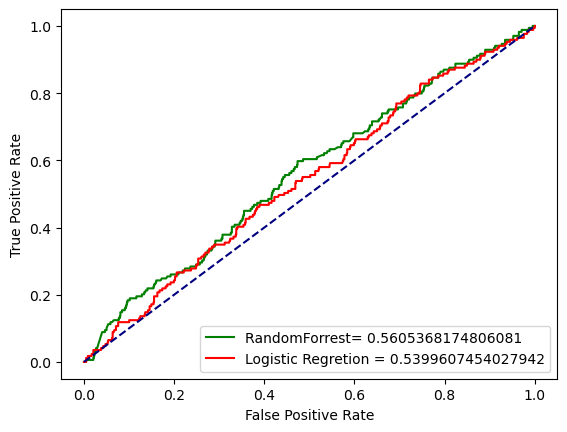

In [36]:
y_pred_proba = tree.predict_proba(mtrain_s) [:,1]
fpr, tpr, treshold = metrics.roc_curve(mdep_train, y_pred_proba)
auc = metrics.roc_auc_score(mdep_train, y_pred_proba)
plt.plot (fpr,tpr,label="RandomForrest= "+str(auc), color = 'green')
x_pred_proba = log_reg.predict_proba(mtrain_s) [:,1]
fpr, tpr, treshold = metrics.roc_curve(mdep_train, x_pred_proba)
auc = metrics.roc_auc_score(mdep_train, x_pred_proba)
plt.plot (fpr,tpr,label="Logistic Regretion = "+str(auc), color='red')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()
